# Transfer Learning - Comparing losses and accuracies for different standard algorithms, Confusion Matrix and Classification Report. 

Importing required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import shutil   
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
import keras
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import LeakyReLU
# from keras.layers.normalization import batch_normalization
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

import warnings
warnings.filterwarnings('ignore')
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
train = 'c:/Users/jadha/Data/MTP_data/Train'
val = 'c:/Users/jadha/Data/MTP_data/Test'
# labels = pd.read_csv("/kaggle/input/10-monkey-species/monkey_labels.txt")
# labels

In [3]:
# Total number of training images
num_of_train_samples = 0
for train_dataset in os.listdir(train):
    in_folder = train + "/" + train_dataset 
    in_folder_list = os.listdir(in_folder)
    num_of_train_samples = num_of_train_samples + len(in_folder_list)
print("Number of Training samples   : ",num_of_train_samples)

# Total number of validation images
num_of_validation_samples = 0
for validation_dataset in os.listdir(val):
    in_folder_val = val + "/" + validation_dataset
    in_folder_val_list = os.listdir(in_folder_val)
    num_of_validation_samples = num_of_validation_samples + len(in_folder_val_list)
print("Number of Validation samples : ", num_of_validation_samples)

Number of Training samples   :  970
Number of Validation samples :  147


# Image Generator: 
Real time data augmentation, the data will be  looped over (in batches)

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255)

defining hyperparameters, image resolution and other stuffs...

In [96]:
batch_size = 32
learning_rate = 0.001
epoch = 30

# Defining image width and height respectively
img_rows = 256
img_cols = 256

In [97]:
train_generator = train_datagen.flow_from_directory(train,
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(val,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

Found 970 images belonging to 9 classes.
Found 147 images belonging to 9 classes.


class_mode = 'binary' (2 output classes) ---- if more class prefer class_mode = 'categorical'.

Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch

# ResNet50

In [98]:
steps_per_epoch = num_of_train_samples // batch_size
print("Steps per epoch: ",steps_per_epoch)

Steps per epoch:  30


In [100]:
from keras.applications import ResNet50
# The sequential API allows you to create models layer-by-layer
resnet_model = Sequential()
resnet_model.add(ResNet50(include_top=False, 
                   pooling='max', 
                   weights='imagenet'))
resnet_model.add(Dense(9, activation="softmax"))

# Summary: to find the number of parameters
resnet_model.layers[0].trainable=False
resnet_model.summary()

# sgd = optimizers.SGD(lr=learning_rate, decay=0.00001,momentum = 0.0,nesterov=False)
resnet_model.compile(loss="categorical_crossentropy",
              optimizer=adam,
              metrics=["accuracy"])


warnings.filterwarnings('ignore')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_9 (Dense)             (None, 9)                 18441     
                                                                 
Total params: 23,606,153
Trainable params: 18,441
Non-trainable params: 23,587,712
_________________________________________________________________


In [101]:
# Trains the model for a given number of epochs (iterations on a dataset).
resnet_training = resnet_model.fit_generator(train_generator,
                               steps_per_epoch = steps_per_epoch,
                               epochs = epoch,
                               validation_data = validation_generator,
                               validation_steps = num_of_validation_samples // batch_size)

Epoch 1/30
30/30 [==============================] - 488s 16s/step - loss: 3.1313 - accuracy: 0.1631 - val_loss: 2.2121 - val_accuracy: 0.2812
Epoch 2/30
30/30 [==============================] - 499s 17s/step - loss: 2.0805 - accuracy: 0.2047 - val_loss: 2.0643 - val_accuracy: 0.3750
Epoch 3/30
30/30 [==============================] - 503s 17s/step - loss: 2.0542 - accuracy: 0.2175 - val_loss: 2.0271 - val_accuracy: 0.2812
Epoch 4/30
30/30 [==============================] - 467s 16s/step - loss: 2.0127 - accuracy: 0.2591 - val_loss: 1.8916 - val_accuracy: 0.5234
Epoch 5/30
30/30 [==============================] - 437s 15s/step - loss: 2.0002 - accuracy: 0.2772 - val_loss: 1.9690 - val_accuracy: 0.4297
Epoch 6/30
30/30 [==============================] - 434s 15s/step - loss: 1.9628 - accuracy: 0.2942 - val_loss: 1.8619 - val_accuracy: 0.4141
Epoch 7/30
30/30 [==============================] - 459s 15s/step - loss: 1.9604 - accuracy: 0.2761 - val_loss: 1.8857 - val_accuracy: 0.4375
Epoch 

# Saving the model history for ResNet - 50

In [94]:
training_accuracy_resnet      = resnet_training.history['accuracy'][-1]
training_loss_resnet          = resnet_training.history['loss'][-1]
validation_accuracy_resnet    = resnet_training.history['val_accuracy'][-1]
validation_loss_resnet        = resnet_training.history['val_loss'][-1]
print("Training Accuracy ResNet   :", training_accuracy_resnet )
print("Training Loss ResNet       :", training_loss_resnet)
print("Validation Accuracy ResNet :", validation_accuracy_resnet)
print("Validation Loss ResNet     :", validation_loss_resnet)

Training Accuracy ResNet   : 0.2620545029640198
Training Loss ResNet       : 2.168004035949707
Validation Accuracy ResNet : 0.2222222238779068
Validation Loss ResNet     : 2.46164870262146


# Generating Confusion Matrix and Classification Report for ResNet 50

In [95]:
# Generating Confusion Matrix and Classification Report
Y_pred_res = resnet_model.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_res = np.argmax(Y_pred_res, axis=1)
print('Confusion Matrix')
conf_matrix_res = confusion_matrix(validation_generator.classes, y_pred_res)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Comman_Carp','Grass_Carp','Mrigal','Pomfret','Rohu','Silver_carp','Tilapia','Tuna']
class_rep_res = classification_report(validation_generator.classes, y_pred_res, target_names=target_names)
print(class_rep_res)


Confusion Matrix
[[12  0  0  0  0  8  0  0  0]
 [ 4  0  0  0  0  6  0  0  0]
 [ 4  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0 10  0  0  0]
 [ 2  0  0  0  0 18  0  0  0]
 [ 3  0  0  0  0  7  0  0  0]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.48      0.60      0.53        20
 Comman_Carp       0.00      0.00      0.00        10
  Grass_Carp       0.00      0.00      0.00         7
      Mrigal       0.00      0.00      0.00        20
     Pomfret       0.00      0.00      0.00        30
        Rohu       0.16      1.00      0.28        20
 Silver_carp       0.00      0.00      0.00        10
     Tilapia       0.00      0.00      0.00        20
        Tuna       0.00      0.00      0.00        10

    accuracy                           0.22       147
   macro avg       0.07      0.18      0.09       147
weighted avg       0.09      0.22      0

# Inception

In [7]:
epoch_inc = 30
learning_rate_inc = 0.001
batch_size_inc = 32

In [8]:
steps_per_epoch_inc = num_of_train_samples // batch_size_inc
print("Steps per epoch: ",steps_per_epoch_inc)

Steps per epoch:  30


In [9]:
from keras.applications import InceptionV3
# The sequential API allows us to create model layer by layer
inc_model = Sequential()
inc_model.add(InceptionV3(include_top=False, 
                      pooling='max',
                      weights='imagenet'))
inc_model.add(Dense(9, activation="softmax"))

# Summary: to find the number of parameters
inc_model.layers[0].trainable=False
inc_model.summary()

adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
inc_model.compile(loss="categorical_crossentropy",
              optimizer=adam,
              metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 9)                 18441     
                                                                 
Total params: 21,821,225
Trainable params: 18,441
Non-trainable params: 21,802,784
_________________________________________________________________


In [10]:
# Trains the model for a given number of epochs (iterations on a dataset).
inc_training = inc_model.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_inc,
                                       epochs = epoch_inc,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size_inc)

Epoch 1/30
30/30 [==============================] - 167s 5s/step - loss: 3.7142 - accuracy: 0.1878 - val_loss: 2.7193 - val_accuracy: 0.1406
Epoch 2/30
30/30 [==============================] - 149s 5s/step - loss: 2.5297 - accuracy: 0.3000 - val_loss: 2.6752 - val_accuracy: 0.1875
Epoch 3/30
30/30 [==============================] - 149s 5s/step - loss: 2.1020 - accuracy: 0.3646 - val_loss: 2.1203 - val_accuracy: 0.2969
Epoch 4/30
30/30 [==============================] - 148s 5s/step - loss: 1.8354 - accuracy: 0.4083 - val_loss: 2.2847 - val_accuracy: 0.2969
Epoch 5/30
30/30 [==============================] - 147s 5s/step - loss: 1.6885 - accuracy: 0.4726 - val_loss: 1.8244 - val_accuracy: 0.3906
Epoch 6/30
30/30 [==============================] - 119s 4s/step - loss: 1.5613 - accuracy: 0.4895 - val_loss: 1.9918 - val_accuracy: 0.3281
Epoch 7/30
30/30 [==============================] - 117s 4s/step - loss: 1.3669 - accuracy: 0.5232 - val_loss: 1.9951 - val_accuracy: 0.2969
Epoch 8/30
30

# Saving the model history for Inception

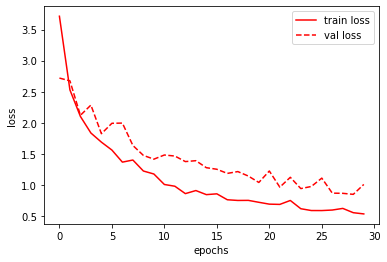

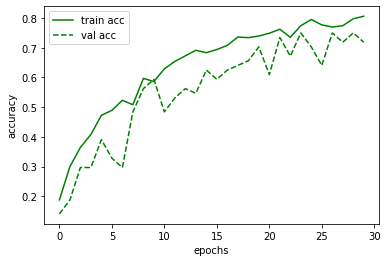

In [11]:
import matplotlib.pyplot as plt
plt.plot(inc_training.history['loss'], label='train loss',color='r')
plt.plot(inc_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(inc_training.history['accuracy'], label='train acc',color='g')
plt.plot(inc_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
# plt.savefig('AccVal_acc')

In [12]:
training_accuracy_inc      = inc_training.history['accuracy'][-1]
training_loss_inc          = inc_training.history['loss'][-1]
validation_accuracy_inc    = inc_training.history['val_accuracy'][-1]
validation_loss_inc        = inc_training.history['val_loss'][-1]
print("Training Accuracy Inception   :", training_accuracy_inc )
print("Training Loss Inception       :", training_loss_inc)
print("Validation Accuracy Inception :", validation_accuracy_inc)
print("Validation Loss Inception     :", validation_loss_inc)

Training Accuracy Inception   : 0.8062499761581421
Training Loss Inception       : 0.5337762236595154
Validation Accuracy Inception : 0.71875
Validation Loss Inception     : 1.0080331563949585


# Generating Confusion Matrix and Classification Report for Inception

In [13]:
# Generating Confusion Matrix and Classification Report
Y_pred_inc = inc_model.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_inc = np.argmax(Y_pred_inc, axis=1)
print('Confusion Matrix')
conf_matrix_inc = confusion_matrix(validation_generator.classes, y_pred_inc)
cm_inc = np.array2string(conf_matrix_inc)
print(conf_matrix_inc)
print("**=============================================================================================**")
print('Classification Report')
target_names = ['Catla','Comman_Carp','Grass_Carp','Mrigal','Pomfret','Rohu','Silver_carp','Tilapia','Tuna']
class_rep_inc = classification_report(validation_generator.classes, y_pred_inc, target_names=target_names)
print(class_rep_inc)

Confusion Matrix
[[14  2  0  1  0  2  0  1  0]
 [ 0  9  0  0  0  1  0  0  0]
 [ 2  0  3  0  0  2  0  0  0]
 [ 0  0  0 13  0  4  0  2  1]
 [ 0  0  0  0 29  0  0  0  1]
 [ 0  1  0  0  0 19  0  0  0]
 [ 2  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  3  0 17  0]
 [ 0  0  0  0  0  1  3  0  6]]
**=============================================================================================**
Classification Report
              precision    recall  f1-score   support

       Catla       0.78      0.70      0.74        20
 Comman_Carp       0.75      0.90      0.82        10
  Grass_Carp       1.00      0.43      0.60         7
      Mrigal       0.93      0.65      0.76        20
     Pomfret       1.00      0.97      0.98        30
        Rohu       0.59      0.95      0.73        20
 Silver_carp       0.73      0.80      0.76        10
     Tilapia       0.85      0.85      0.85        20
        Tuna       0.75      0.60      0.67        10

    accuracy                           0.80       

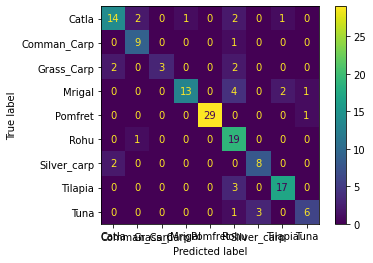

In [34]:
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(conf_matrix_inc,display_labels=target_names)
disp.plot()
plt.show()

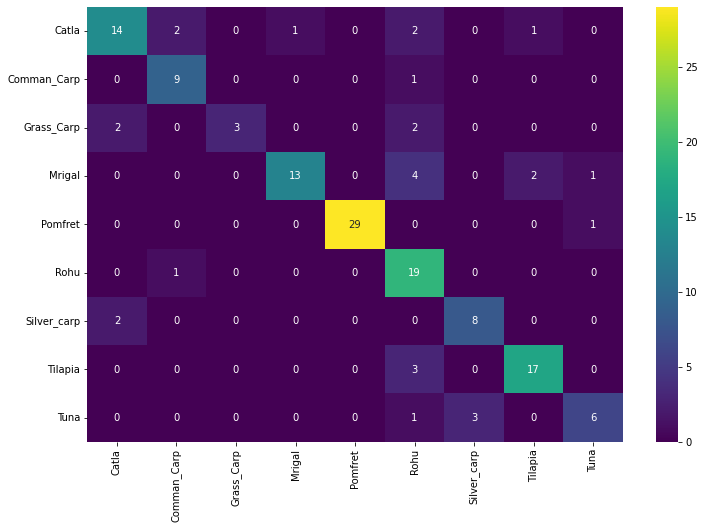

In [43]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix_inc, annot=True, cmap='viridis',xticklabels=target_names,yticklabels=target_names)
plt.show()

# VGG16

In [47]:
epoch_vgg = 30
# learning_rate_vgg = 0.001
batch_size_vgg = 32
steps_per_epoch_vgg = num_of_train_samples // batch_size_vgg
print("Steps per epoch: ",steps_per_epoch_vgg)

Steps per epoch:  30


In [48]:
from keras.applications import vgg16
    # The sequential API allows you to create models layer-by-layer
vgg_model=Sequential()
vgg_model.add(vgg16.VGG16(include_top = False, pooling = 'max', weights = 'imagenet'))
vgg_model.add(Dense(9, activation="softmax"))

    # Summary: to find the number of parameters
vgg_model.layers[0].trainable=False
vgg_model.summary() 

# adam = optimizers.Adam(lr=learning_rate_vgg, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
vgg_model.compile(loss="categorical_crossentropy",
                  optimizer=adam,
                  metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_2 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 14,719,305
Trainable params: 4,617
Non-trainable params: 14,714,688
_________________________________________________________________


In [49]:
# Trains the model for a given number of epochs (iterations on a dataset).
vgg_training = vgg_model.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_vgg,
                                       epochs = epoch_vgg,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size_vgg)

Epoch 1/30
30/30 [==============================] - 179s 6s/step - loss: 2.6406 - accuracy: 0.1229 - val_loss: 2.7233 - val_accuracy: 0.0781
Epoch 2/30
30/30 [==============================] - 171s 6s/step - loss: 1.9852 - accuracy: 0.2532 - val_loss: 2.7562 - val_accuracy: 0.0781
Epoch 3/30
30/30 [==============================] - 172s 6s/step - loss: 1.8679 - accuracy: 0.3104 - val_loss: 2.4662 - val_accuracy: 0.0938
Epoch 4/30
30/30 [==============================] - 172s 6s/step - loss: 1.8228 - accuracy: 0.3750 - val_loss: 2.3796 - val_accuracy: 0.0781
Epoch 5/30
30/30 [==============================] - 173s 6s/step - loss: 1.7603 - accuracy: 0.3771 - val_loss: 2.3658 - val_accuracy: 0.1094
Epoch 6/30
30/30 [==============================] - 173s 6s/step - loss: 1.6821 - accuracy: 0.4104 - val_loss: 2.3109 - val_accuracy: 0.1094
Epoch 7/30
30/30 [==============================] - 171s 6s/step - loss: 1.7084 - accuracy: 0.3861 - val_loss: 2.2268 - val_accuracy: 0.1406
Epoch 8/30
30

# Model history for VGG

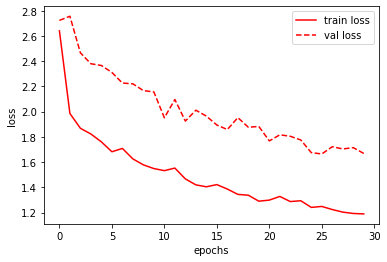

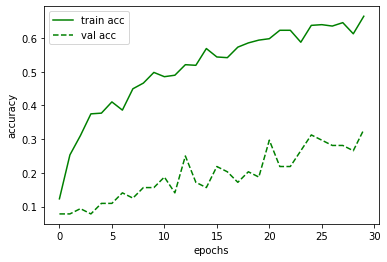

<Figure size 432x288 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
plt.plot(vgg_training.history['loss'], label='train loss',color='r')
plt.plot(vgg_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vgg_training.history['accuracy'], label='train acc',color='g')
plt.plot(vgg_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [51]:
training_accuracy_vgg      = vgg_training.history['accuracy'][-1]
training_loss_vgg          = vgg_training.history['loss'][-1]
validation_accuracy_vgg    = vgg_training.history['val_accuracy'][-1]
validation_loss_vgg        = vgg_training.history['val_loss'][-1]
print("Training Accuracy VGG    :", training_accuracy_vgg )
print("Training Loss VGG        :", training_loss_vgg)
print("Validation Accuracy VGG  :", validation_accuracy_vgg)
print("Validation Loss VGG      :", validation_loss_vgg)

Training Accuracy VGG    : 0.6645569801330566
Training Loss VGG        : 1.1893326044082642
Validation Accuracy VGG  : 0.328125
Validation Loss VGG      : 1.6684781312942505


# Confusion Matrix and Classification Report for VGG


In [52]:
# Generating Confusion Matrix and Classification Report
Y_pred_vgg = vgg_model.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_vgg = np.argmax(Y_pred_vgg, axis=1)
print('Confusion Matrix')
conf_matrix_vgg = confusion_matrix(validation_generator.classes, y_pred_vgg)
cm_vgg = np.array2string(conf_matrix_vgg)
print(conf_matrix_vgg)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Comman_Carp','Grass_Carp','Mrigal','Pomfret','Rohu','Silver_carp','Tilapia','Tuna']
class_rep_vgg = classification_report(validation_generator.classes, y_pred_vgg, target_names=target_names)
print(class_rep_vgg)

Confusion Matrix
[[ 9  0  0  0  0  0  0 11  0]
 [ 3  4  0  0  0  3  0  0  0]
 [ 3  1  0  1  0  2  0  0  0]
 [ 0  0  0  1  5  5  0  9  0]
 [ 0  0  0  0 30  0  0  0  0]
 [ 1  0  0  0  0  6  0 13  0]
 [ 2  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 1  0  0  0  0  0  3  3  3]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.47      0.45      0.46        20
 Comman_Carp       0.80      0.40      0.53        10
  Grass_Carp       0.00      0.00      0.00         7
      Mrigal       0.50      0.05      0.09        20
     Pomfret       0.86      1.00      0.92        30
        Rohu       0.38      0.30      0.33        20
 Silver_carp       0.73      0.80      0.76        10
     Tilapia       0.36      1.00      0.53        20
        Tuna       1.00      0.30      0.46        10

    accuracy                           0.55       147
   macro avg       0.57      0.48      0.45       147
weighted avg       0.58      0.55      0

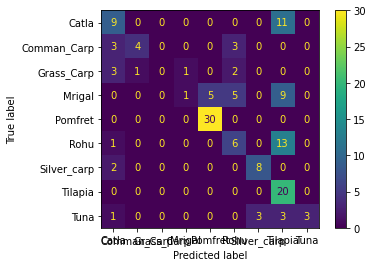

In [53]:
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(conf_matrix_vgg,display_labels=target_names)
disp.plot()
plt.show()

# VGG 19

In [58]:
epoch_vgg19 = 30
# learning_rate_vgg = 0.001
batch_size_vgg19 = 32
steps_per_epoch_vgg19 = num_of_train_samples // batch_size_vgg19
print("Steps per epoch: ",steps_per_epoch_vgg19)

Steps per epoch:  30


In [59]:
from keras.applications import vgg19
    # The sequential API allows you to create models layer-by-layer
vgg19_model=Sequential()
vgg19_model.add(vgg19.VGG19(include_top = False, pooling = 'max', weights = 'imagenet'))
vgg19_model.add(Dense(9, activation="softmax"))

    # Summary: to find the number of parameters
vgg19_model.layers[0].trainable=False
vgg19_model.summary() 

# adam = optimizers.Adam(lr=learning_rate_vgg, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
vgg19_model.compile(loss="categorical_crossentropy",
                  optimizer=adam,
                  metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense_3 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 20,029,001
Trainable params: 4,617
Non-trainable params: 20,024,384
_________________________________________________________________


In [60]:
vgg19_training = vgg19_model.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_vgg19,
                                       epochs = epoch_vgg19,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size_vgg19)

Epoch 1/30
30/30 [==============================] - 193s 6s/step - loss: 2.1396 - accuracy: 0.2271 - val_loss: 2.4022 - val_accuracy: 0.1875
Epoch 2/30
30/30 [==============================] - 188s 6s/step - loss: 1.9069 - accuracy: 0.3125 - val_loss: 2.0329 - val_accuracy: 0.2188
Epoch 3/30
30/30 [==============================] - 186s 6s/step - loss: 1.8260 - accuracy: 0.3625 - val_loss: 2.0140 - val_accuracy: 0.2188
Epoch 4/30
30/30 [==============================] - 183s 6s/step - loss: 1.7385 - accuracy: 0.3987 - val_loss: 1.9630 - val_accuracy: 0.2656
Epoch 5/30
30/30 [==============================] - 154s 5s/step - loss: 1.6619 - accuracy: 0.4620 - val_loss: 1.8863 - val_accuracy: 0.2812
Epoch 6/30
30/30 [==============================] - 162s 5s/step - loss: 1.6583 - accuracy: 0.4578 - val_loss: 1.9183 - val_accuracy: 0.2344
Epoch 7/30
30/30 [==============================] - 164s 5s/step - loss: 1.5840 - accuracy: 0.4789 - val_loss: 1.9660 - val_accuracy: 0.2500
Epoch 8/30
30

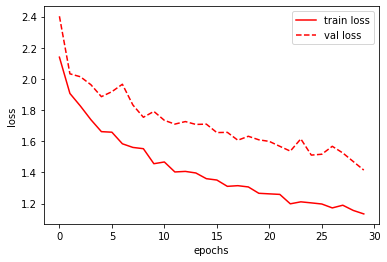

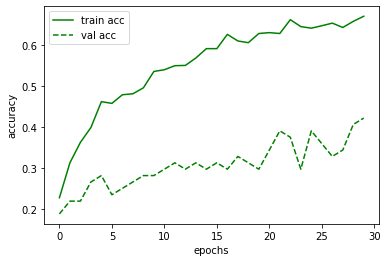

<Figure size 432x288 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt
plt.plot(vgg19_training.history['loss'], label='train loss',color='r')
plt.plot(vgg19_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vgg19_training.history['accuracy'], label='train acc',color='g')
plt.plot(vgg19_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [62]:
training_accuracy_vgg19      = vgg19_training.history['accuracy'][-1]
training_loss_vgg19          = vgg19_training.history['loss'][-1]
validation_accuracy_vgg19    = vgg19_training.history['val_accuracy'][-1]
validation_loss_vgg19        = vgg19_training.history['val_loss'][-1]
print("Training Accuracy VGG    :", training_accuracy_vgg19 )
print("Training Loss VGG        :", training_loss_vgg19)
print("Validation Accuracy VGG  :", validation_accuracy_vgg19)
print("Validation Loss VGG      :", validation_loss_vgg19)

Training Accuracy VGG    : 0.6708860993385315
Training Loss VGG        : 1.1340701580047607
Validation Accuracy VGG  : 0.421875
Validation Loss VGG      : 1.4153482913970947


In [63]:
# Generating Confusion Matrix and Classification Report
Y_pred_vgg19 = vgg19_model.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_vgg19 = np.argmax(Y_pred_vgg19, axis=1)
print('Confusion Matrix')
conf_matrix_vgg19 = confusion_matrix(validation_generator.classes, y_pred_vgg19)
cm_vgg19 = np.array2string(conf_matrix_vgg19)
print(conf_matrix_vgg19)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Comman_Carp','Grass_Carp','Mrigal','Pomfret','Rohu','Silver_carp','Tilapia','Tuna']
class_rep_vgg19 = classification_report(validation_generator.classes, y_pred_vgg19, target_names=target_names)
print(class_rep_vgg19)

Confusion Matrix
[[14  0  0  0  0  4  0  2  0]
 [ 1  2  0  1  0  6  0  0  0]
 [ 0  0  0  1  0  5  1  0  0]
 [ 0  0  0  4  3  1  0 12  0]
 [ 0  0  0  0 30  0  0  0  0]
 [ 0  0  0  4  6  5  0  5  0]
 [ 0  0  0  0  0  0  9  1  0]
 [ 0  0  0  0  2  0  0 18  0]
 [ 4  0  0  0  0  0  3  0  3]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.74      0.70      0.72        20
 Comman_Carp       1.00      0.20      0.33        10
  Grass_Carp       0.00      0.00      0.00         7
      Mrigal       0.40      0.20      0.27        20
     Pomfret       0.73      1.00      0.85        30
        Rohu       0.24      0.25      0.24        20
 Silver_carp       0.69      0.90      0.78        10
     Tilapia       0.47      0.90      0.62        20
        Tuna       1.00      0.30      0.46        10

    accuracy                           0.58       147
   macro avg       0.59      0.49      0.47       147
weighted avg       0.58      0.58      0

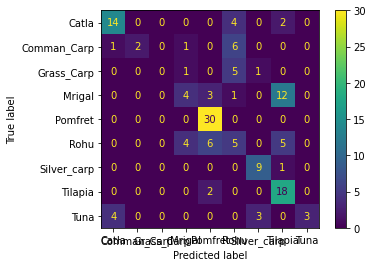

In [64]:
# import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(conf_matrix_vgg19,display_labels=target_names)
disp.plot()
plt.show()

# Custom Network

In [74]:
epoch_cn = 30
learning_rate_cn = 0.001
batch_size_cn = 64
steps_per_epoch_cn = num_of_train_samples // batch_size_cn
print("Steps per epoch: ",steps_per_epoch_cn)

Steps per epoch:  15


In [75]:
# Custom network
model_cn = Sequential()
model_cn.add(Conv2D(16,(3,3),input_shape=(256,256,3),padding='same'))
model_cn.add(Activation('relu'))
# model_cn.add(BatchNormalization)
model_cn.add(MaxPooling2D(pool_size=(2,2)))

model_cn.add(Conv2D(32,(3,3),padding='same'))
model_cn.add(Activation('relu'))
# model_cn.add(BatchNormalization())
model_cn.add(MaxPooling2D(pool_size=(2,2)))
model_cn.add(Dropout(0.25))


model_cn.add(Conv2D(32,(3,3),padding='same'))
model_cn.add(Activation('relu'))
# model_cn.add(BatchNormalization())
model_cn.add(MaxPooling2D(pool_size=(2,2)))

model_cn.add(Conv2D(64,(3,3),padding='same'))
model_cn.add(Activation('relu'))
# model_cn.add(BatchNormalization())
model_cn.add(MaxPooling2D(pool_size=(2,2)))

model_cn.add(Flatten())
model_cn.add(Dense(256,activation='relu'))
#model.add(LeakyReLU(0.1))
model_cn.add(Dropout(0.5))
model_cn.add(Dense(9))
model_cn.add(Activation("softmax"))

model_cn.summary()


model_cn.compile(loss="categorical_crossentropy",
                  optimizer= 'adam',
                  metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 activation_94 (Activation)  (None, 256, 256, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 activation_95 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [76]:
# Trains the model for a given number of epochs (iterations on a dataset).
cn_training = model_cn.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_cn,
                                       epochs = epoch_cn,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size_cn)

Epoch 1/30
15/15 [==============================] - 78s 5s/step - loss: 2.4628 - accuracy: 0.1458 - val_loss: 2.0391 - val_accuracy: 0.6250
Epoch 2/30
15/15 [==============================] - 68s 5s/step - loss: 2.0386 - accuracy: 0.1795 - val_loss: 2.1995 - val_accuracy: 0.0000e+00
Epoch 3/30
15/15 [==============================] - 69s 5s/step - loss: 2.0791 - accuracy: 0.2009 - val_loss: 2.1668 - val_accuracy: 0.0000e+00
Epoch 4/30
15/15 [==============================] - 72s 5s/step - loss: 2.0983 - accuracy: 0.1875 - val_loss: 2.1371 - val_accuracy: 0.5312
Epoch 5/30
15/15 [==============================] - 70s 5s/step - loss: 2.0547 - accuracy: 0.2083 - val_loss: 2.2040 - val_accuracy: 0.0625
Epoch 6/30
15/15 [==============================] - 70s 5s/step - loss: 2.0610 - accuracy: 0.1708 - val_loss: 1.9631 - val_accuracy: 0.6250
Epoch 7/30
15/15 [==============================] - 69s 5s/step - loss: 1.9623 - accuracy: 0.2333 - val_loss: 1.7480 - val_accuracy: 0.6250
Epoch 8/30
1

# Saving the model history for Custom network

In [77]:
training_accuracy_cn      = cn_training.history['accuracy'][-1]
training_loss_cn          = cn_training.history['loss'][-1]
validation_accuracy_cn    = cn_training.history['val_accuracy'][-1]
validation_loss_cn        = cn_training.history['val_loss'][-1]
print("Training Accuracy CN    :", training_accuracy_cn )
print("Training Loss CN        :", training_loss_cn)
print("Validation Accuracy CN  :", validation_accuracy_cn)
print("Validation Loss CN      :", validation_loss_cn)

Training Accuracy CN    : 0.44999998807907104
Training Loss CN        : 1.444693684577942
Validation Accuracy CN  : 0.625
Validation Loss CN      : 1.9299068450927734


# Generating Confusion Matrix and Classification Report for Custom Network

In [78]:
# Generating Confusion Matrix and Classification Report
Y_pred_cn = model_cn.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_cn = np.argmax(Y_pred_cn, axis=1)
print('Confusion Matrix')
conf_matrix_cn = confusion_matrix(validation_generator.classes, y_pred_cn)
cm_cn = np.array2string(conf_matrix_cn)
print(conf_matrix_cn)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Comman_Carp','Grass_Carp','Mrigal','Pomfret','Rohu','Silver_carp','Tilapia','Tuna']
class_rep_cn = classification_report(validation_generator.classes, y_pred_cn, target_names=target_names)
print(class_rep_cn)

Confusion Matrix
[[20  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  5  1  0  0]
 [ 6  0  0  0  0  1  0  0  0]
 [ 0  0  0  3  0  1  0 16  0]
 [ 1  0  0  2 12  2  0  8  5]
 [ 5  0  0  0  0  0  0 15  0]
 [ 2  0  0  0  0  2  6  0  0]
 [ 2  0  0  0  0  6  0 12  0]
 [ 0  0  0  0  0 10  0  0  0]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.50      1.00      0.67        20
 Comman_Carp       0.00      0.00      0.00        10
  Grass_Carp       0.00      0.00      0.00         7
      Mrigal       0.60      0.15      0.24        20
     Pomfret       1.00      0.40      0.57        30
        Rohu       0.00      0.00      0.00        20
 Silver_carp       0.86      0.60      0.71        10
     Tilapia       0.24      0.60      0.34        20
        Tuna       0.00      0.00      0.00        10

    accuracy                           0.36       147
   macro avg       0.35      0.31      0.28       147
weighted avg       0.44      0.36      0

# Comparing Accuracies and losses for all the models

In [79]:

model_comp = pd.DataFrame({"Models": ['VGG19', 'Inception', 'VGG16', 'Custom Network'],
                           "Batch Size":[32,32,32,64],
                           "Epochs":[30,30,30,30],
                           "Learning Rate": [0.001,0.001,0.001,0.001],
                           "Steps per epoch":[30,30,30,15],
                           "Image Resolution":['256*256','256*256', '256*256', '256*256'],
                          "Training Accuracy": [training_accuracy_vgg19,training_accuracy_inc,training_accuracy_vgg,training_accuracy_cn],
                          "Training Loss": [training_loss_vgg19,training_loss_inc,training_loss_vgg,training_loss_cn],
                          "Validation Accuracy": [validation_accuracy_vgg19,validation_accuracy_inc,validation_accuracy_vgg,validation_accuracy_cn],
                          "Validation Loss": [validation_loss_vgg19,validation_loss_inc,validation_loss_vgg,validation_loss_cn],
                          })
model_comp

,Models,Batch Size,Epochs,Learning Rate,Steps per epoch,Image Resolution,Training Accuracy,Training Loss,Validation Accuracy,Validation Loss
0,VGG19,32,30,0.001,30,256*256,0.670886,1.134070,0.421875,1.415348
1,Inception,32,30,0.001,30,256*256,0.806250,0.533776,0.718750,1.008033
2,VGG16,32,30,0.001,30,256*256,0.664557,1.189333,0.328125,1.668478
3,Custom Network,64,30,0.001,15,256*256,0.450000,1.444694,0.625000,1.929907


# Combine Result

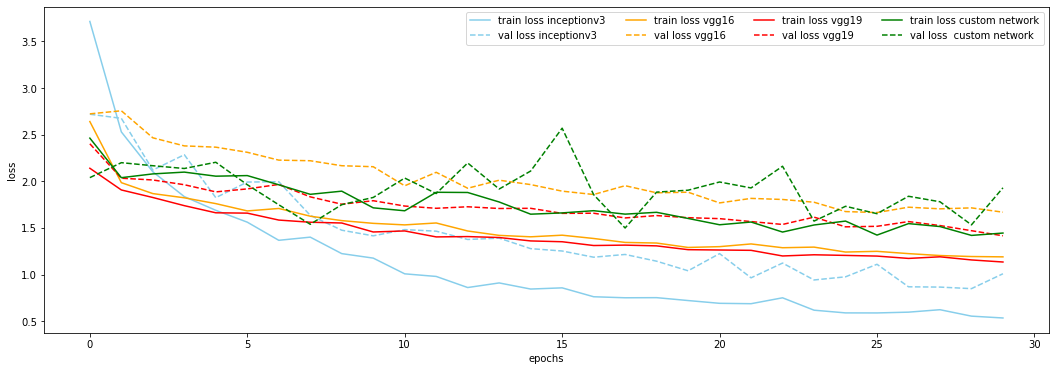

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))

plt.plot(inc_training.history['loss'], label='train loss inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_loss'], label='val loss inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['loss'], label='train loss vgg16',color='orange')
plt.plot(vgg_training.history['val_loss'], label='val loss vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['loss'], label='train loss vgg19',color='red')
plt.plot(vgg19_training.history['val_loss'], label='val loss vgg19',linestyle='--',color='red')

# plt.plot(resnet_training.history['loss'], label='train loss resnet',color='yellow')
# plt.plot(resnet_training.history['val_loss'], label='val loss resnet',linestyle='--',color='yellow')

plt.plot(cn_training.history['loss'], label='train loss custom network',color='green')
plt.plot(cn_training.history['val_loss'], label='val loss  custom network',linestyle='--',color='green')

plt.legend(ncol=4)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')


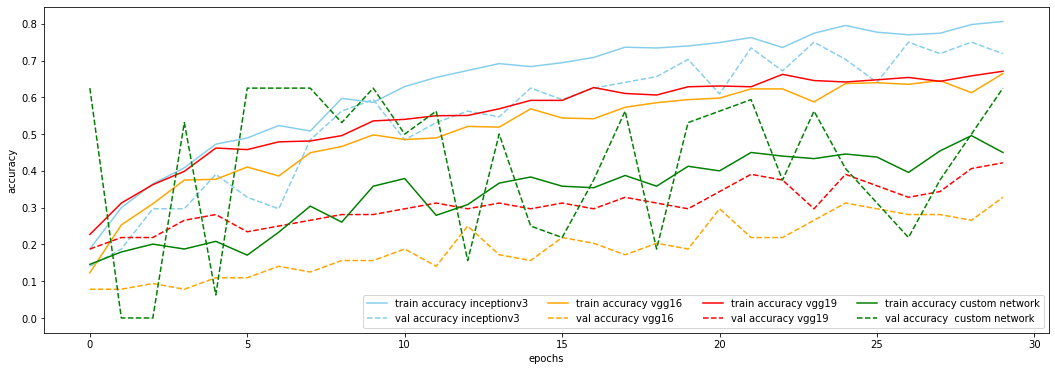

In [84]:

# plot the accuracy
# plt.plot(inc_training.history['accuracy'], label='train acc',color='g')
# plt.plot(inc_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')

plt.figure(figsize=(18,6))
plt.plot(inc_training.history['accuracy'], label='train accuracy inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_accuracy'], label='val accuracy inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['accuracy'], label='train accuracy vgg16',color='orange')
plt.plot(vgg_training.history['val_accuracy'], label='val accuracy vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['accuracy'], label='train accuracy vgg19',color='red')
plt.plot(vgg19_training.history['val_accuracy'], label='val accuracy vgg19',linestyle='--',color='red')

# plt.plot(resnet_training.history['accuracy'], label='train accuracy resnet',color='yellow')
# plt.plot(resnet_training.history['val_accuracy'], label='val accuracy resnet',linestyle='--',color='yellow')

plt.plot(cn_training.history['accuracy'], label='train accuracy custom network',color='green')
plt.plot(cn_training.history['val_accuracy'], label='val accuracy  custom network',linestyle='--',color='green')


plt.legend(ncol=4)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.tight_layout
plt.show()

# without custom network


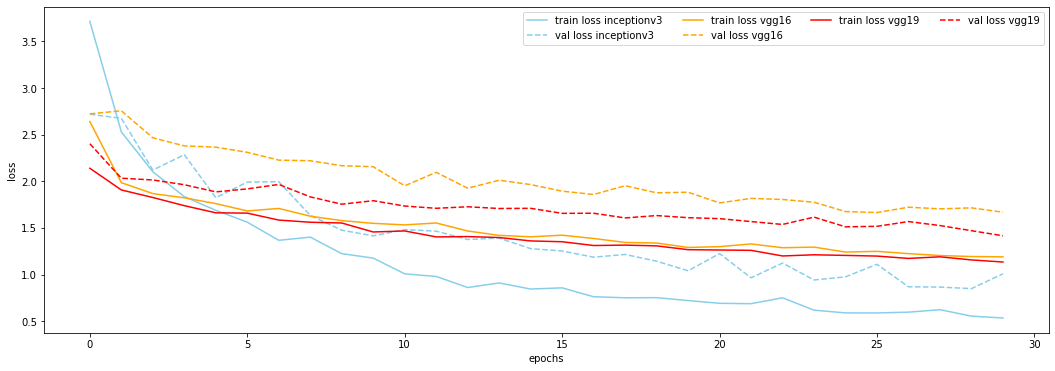

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))

plt.plot(inc_training.history['loss'], label='train loss inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_loss'], label='val loss inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['loss'], label='train loss vgg16',color='orange')
plt.plot(vgg_training.history['val_loss'], label='val loss vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['loss'], label='train loss vgg19',color='red')
plt.plot(vgg19_training.history['val_loss'], label='val loss vgg19',linestyle='--',color='red')

# plt.plot(resnet_training.history['loss'], label='train loss resnet',color='yellow')
# plt.plot(resnet_training.history['val_loss'], label='val loss resnet',linestyle='--',color='yellow')

# plt.plot(cn_training.history['loss'], label='train loss custom network',color='green')
# plt.plot(cn_training.history['val_loss'], label='val loss  custom network',linestyle='--',color='green')

plt.legend(ncol=3)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')


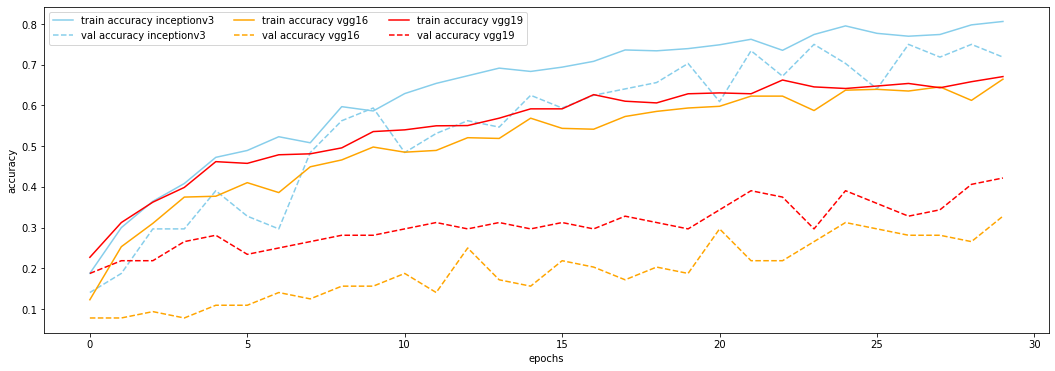

In [103]:

# plot the accuracy
# plt.plot(inc_training.history['accuracy'], label='train acc',color='g')
# plt.plot(inc_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')

plt.figure(figsize=(18,6))
plt.plot(inc_training.history['accuracy'], label='train accuracy inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_accuracy'], label='val accuracy inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['accuracy'], label='train accuracy vgg16',color='orange')
plt.plot(vgg_training.history['val_accuracy'], label='val accuracy vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['accuracy'], label='train accuracy vgg19',color='red')
plt.plot(vgg19_training.history['val_accuracy'], label='val accuracy vgg19',linestyle='--',color='red')

# plt.plot(resnet_training.history['accuracy'], label='train accuracy resnet',color='yellow')
# plt.plot(resnet_training.history['val_accuracy'], label='val accuracy resnet',linestyle='--',color='yellow')

# plt.plot(cn_training.history['accuracy'], label='train accuracy custom network',color='green')
# plt.plot(cn_training.history['val_accuracy'], label='val accuracy  custom network',linestyle='--',color='green')


plt.legend(ncol=3)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.tight_layout
plt.show()